In [3]:
import os
import glob
import yaml
import PIL.Image
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
# import ttach as tta
from skimage.filters import threshold_otsu
import argparse
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!which pip

/mnt/netapp2/Store_uni/home/usc/ci/fgs/.conda/envs/TFM_final/bin/pip


In [4]:
def recover_image_mask_pairs(root_dir):
    # [Unchanged from original code]
    image_mask_pairs = []
    for case in os.listdir(root_dir):
        case_path = os.path.join(root_dir, case)
        if os.path.isdir(case_path):
            for file in os.listdir(case_path):
                if file.lower().endswith('.tif') and '_mask' not in file:
                    image_path = os.path.join(case_path, file)
                    base, ext = os.path.splitext(file)
                    mask_file = base + '_mask' + ext
                    mask_path = os.path.join(case_path, mask_file)
                    if os.path.exists(mask_path):
                        image_mask_pairs.append((image_path, mask_path))
                    else:
                        print(f'Warning: Mask not found for image {image_path}')
    return image_mask_pairs


In [5]:
pairs = recover_image_mask_pairs("/mnt/netapp2/Store_uni/home/usc/ci/fgs/git_repo/Codigo_TFM/MRI/filtered_data")

In [6]:
pair = pairs[0]
image_path, mask_path = pair
image = PIL.Image.open(image_path).convert('RGB')
mask = PIL.Image.open(mask_path).convert('L')

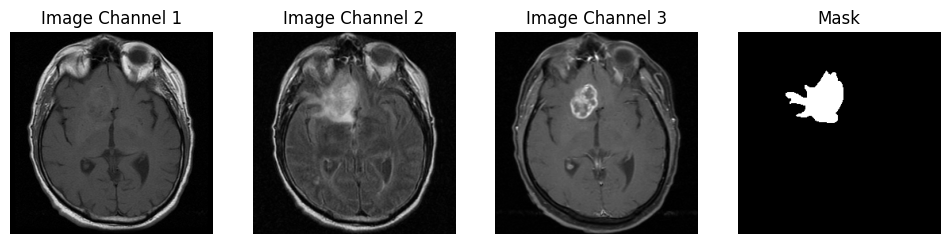

In [7]:
# See the 3 channels of the image individually with the mask aside
image = np.array(image)
mask = np.array(mask)
mask = mask.astype(np.uint8)
mask = np.expand_dims(mask, axis=-1)
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.imshow(image[:, :, 0], cmap='gray')
plt.title('Image Channel 1')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(image[:, :, 1], cmap='gray')
plt.title('Image Channel 2')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(image[:, :, 2], cmap='gray')
plt.title('Image Channel 3')
plt.axis('off')
plt.subplot(1, 4, 4)
plt.imshow(mask[:, :, 0], cmap='gray')
plt.title('Mask')
plt.axis('off')
plt.show()


In [8]:
def see_channels_and_mask(image_path, mask_path):
    image = PIL.Image.open(image_path).convert('RGB')
    mask = PIL.Image.open(mask_path).convert('L')

    # See the 3 channels of the image individually with the mask aside
    image = np.array(image)
    mask = np.array(mask)
    mask = mask.astype(np.uint8)
    mask = np.expand_dims(mask, axis=-1)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 4, 1)
    plt.imshow(image[:, :, 0], cmap='gray')
    plt.title('Image Channel 1')
    plt.axis('off')
    plt.subplot(1, 4, 2)
    plt.imshow(image[:, :, 1], cmap='gray')
    plt.title('Image Channel 2')
    plt.axis('off')
    plt.subplot(1, 4, 3)
    plt.imshow(image[:, :, 2], cmap='gray')
    plt.title('Image Channel 3')
    plt.axis('off')
    plt.subplot(1, 4, 4)
    plt.imshow(mask[:, :, 0], cmap='gray')
    plt.title('Mask')
    plt.axis('off')
    plt.show()



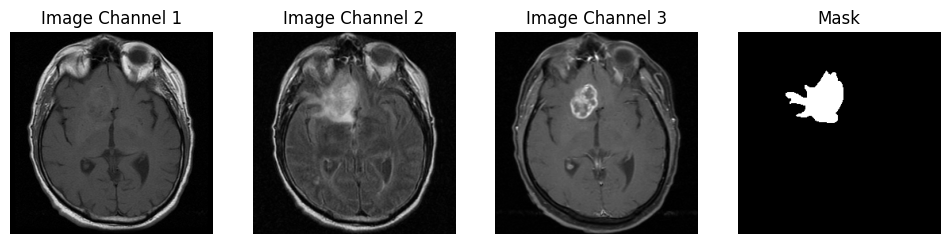

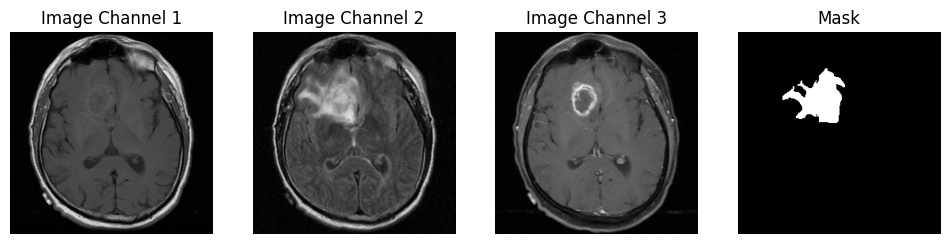

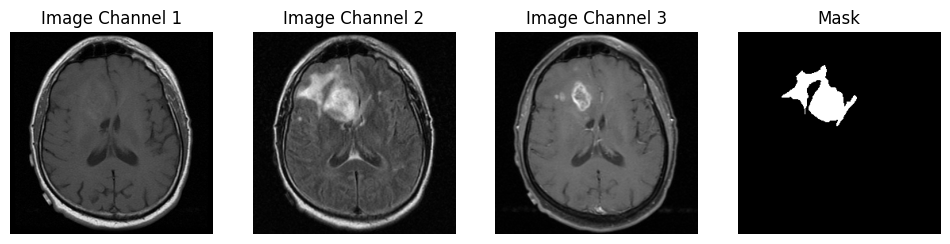

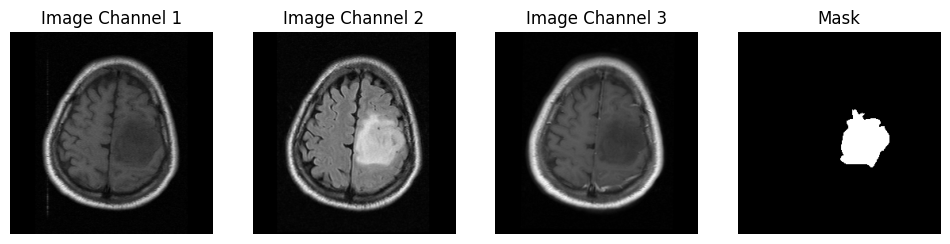

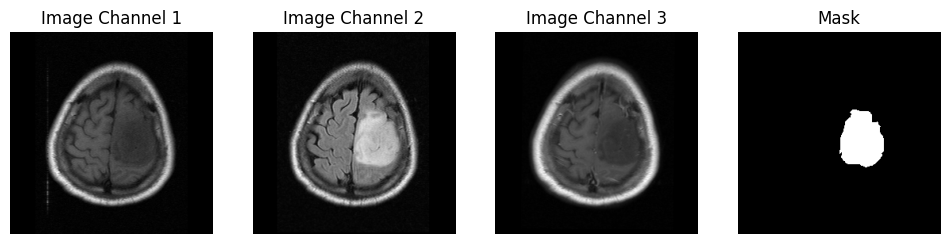

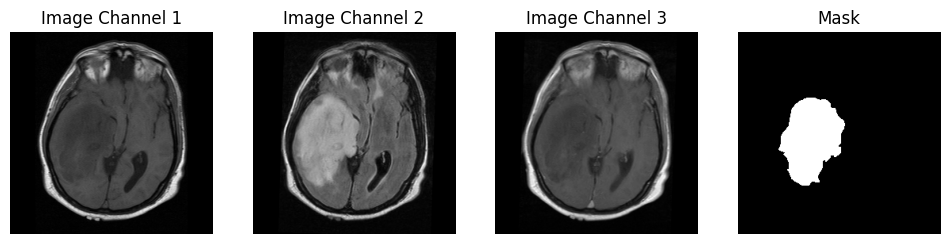

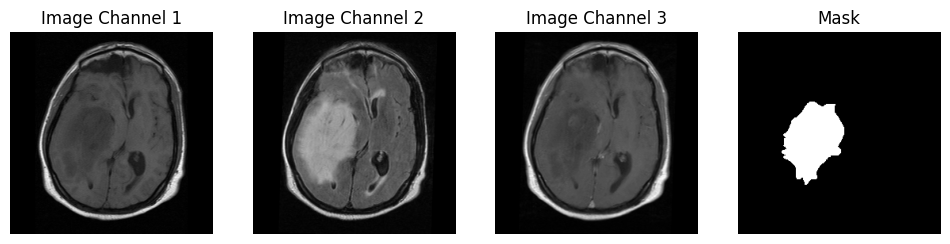

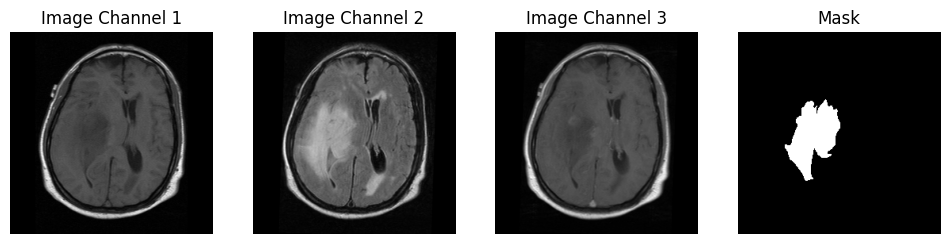

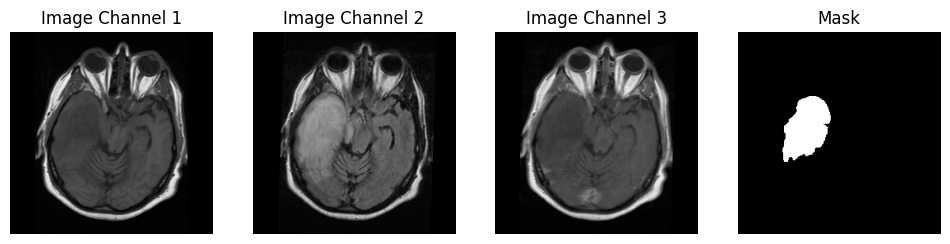

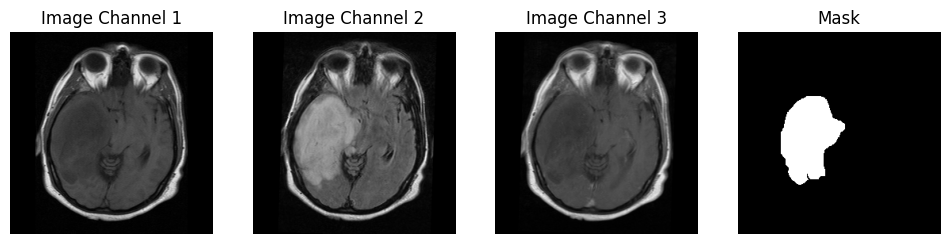

In [9]:
for pair in pairs[:10]:
    image_path, mask_path = pair
    see_channels_and_mask(image_path, mask_path)
    plt.show()

In [10]:
def see_all_image_individual_channels_and_mean_between_channels(image_path, mask_path):
    image = PIL.Image.open(image_path).convert('RGB')
    mask = PIL.Image.open(mask_path).convert('L')

    # See the 3 channels of the image individually with the mask aside
    image = np.array(image)
    mask = np.array(mask)
    mask = mask.astype(np.uint8)
    mask = np.expand_dims(mask, axis=-1)
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 5, 1)
    plt.imshow(image[:, :, 0], cmap='gray')
    plt.title('Image Channel 1')
    plt.axis('off')
    plt.subplot(1, 5, 2)
    plt.imshow(image[:, :, 1], cmap='gray')
    plt.title('Image Channel 2')
    plt.axis('off')
    plt.subplot(1, 5, 3)
    plt.imshow(image[:, :, 2], cmap='gray')
    plt.title('Image Channel 3')
    plt.axis('off')
    
    # Calculate mean between channels
    mean_image = np.mean(image, axis=2)
    
    # Show mean image
    plt.subplot(1, 5, 4)
    plt.imshow(mean_image, cmap='gray')
    plt.title('Mean Image')
    plt.axis('off')

    # Show mask
    plt.subplot(1, 5, 5)
    plt.imshow(mask[:, :, 0], cmap='gray')
    plt.title('Mask')

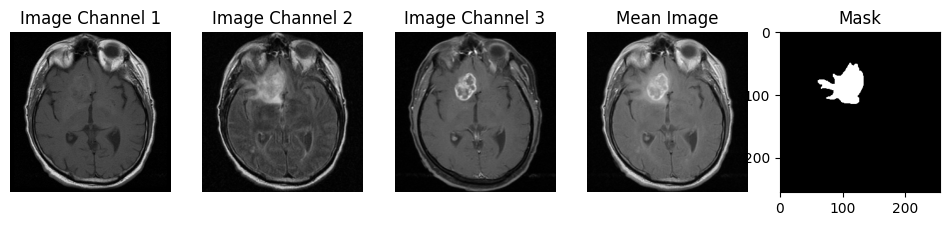

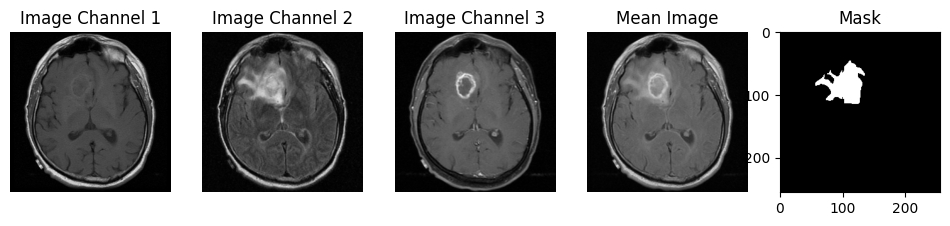

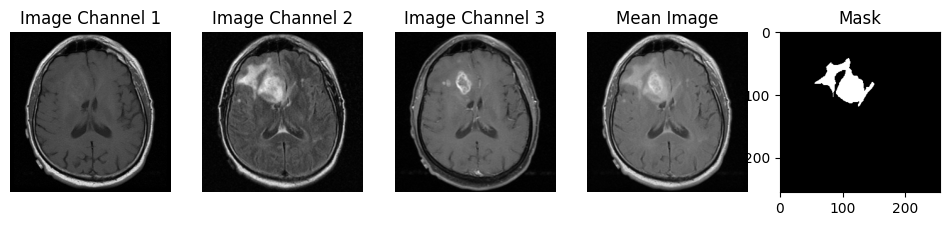

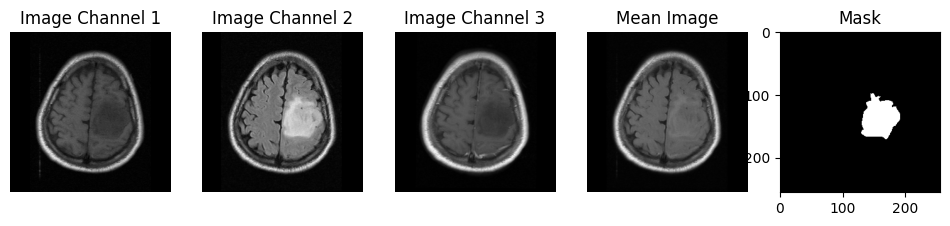

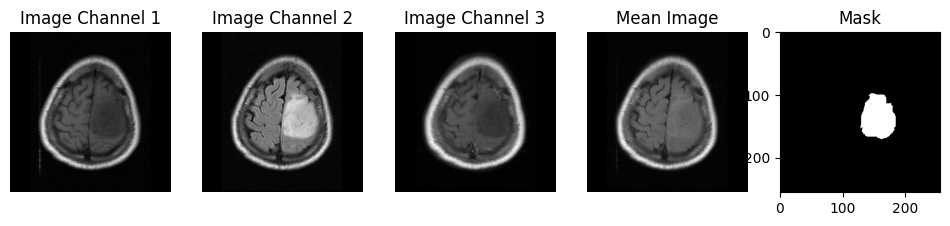

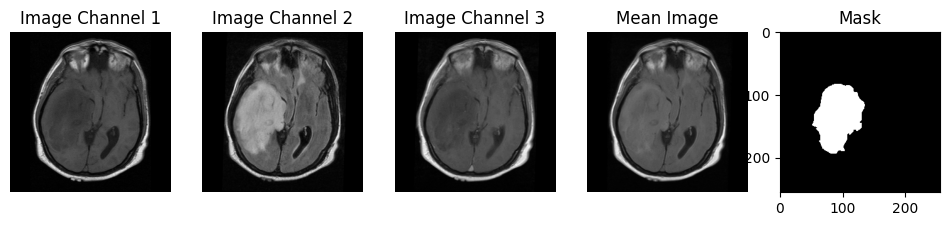

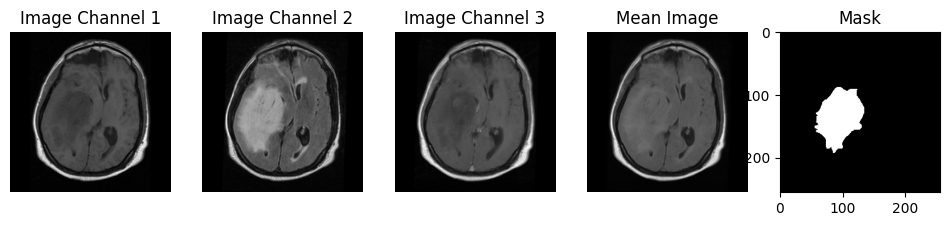

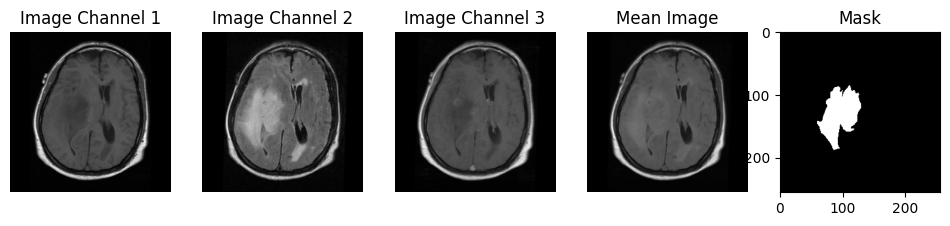

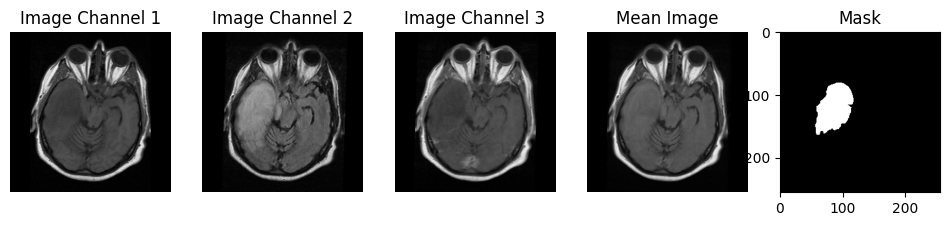

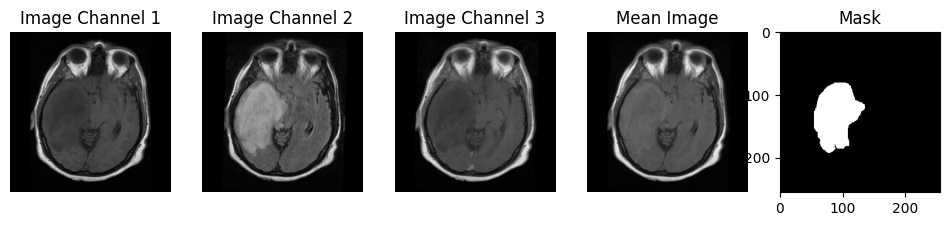

In [12]:
for pair in pairs[:10]:
    image_path, mask_path = pair
    see_all_image_individual_channels_and_mean_between_channels(image_path, mask_path)
    plt.show()
    